## Análise de Negócios
### Preços dos combustíveis ofertados nos postos

<img src = 'img\preco_combustivel.jpeg'>

### Análise de negócios: Entendendo a dinâmica de preços ofertada pelos postos

1 - Dados serão coletados da ANP <br/>
link: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis <br/>

<img src = 'img\anp.png' ><br/>

Para melhor análise, serão considerados os dados dos últimos 5 anos.<br/>
<img src = 'img\tabela_base_dados.png'><br/>



2 - Armazenar esses dados em um banco de dados <br/>

<img src = 'img\PostgreSQL-logo.png'><br/>
<img src = 'img\postgre1.png'><br/>

Para armazenamento do **banco de dados** será utilizado o PostgreSQL: open source, free e robusto. Abaixo, a _query_ inserida para criação da tabela preco_combustivel, com colunas e tipos de dados.<br/>

In [1]:
"""
CREATE TABLE anp.preco_combustivel(
		regiao 				varchar(255)
		,estado				varchar(255)
		,municipio			varchar(255)
		,revenda			varchar(255)
		,cnpj				varchar(255)
		,nome_rua			varchar(255)	
		,numero_rua			varchar(255)
		,complemento		varchar(255)
		,bairro				varchar(255)
		,cep				varchar(255)
		,produto			varchar(255)
		,data_coleta		date
		,valor_venda		float
		,unidade_medida		varchar(255)
		,bandeira			varchar(255)

)
"""

'\nCREATE TABLE anp.preco_combustivel(\n\t\tregiao \t\t\t\tvarchar(255)\n\t\t,estado\t\t\t\tvarchar(255)\n\t\t,municipio\t\t\tvarchar(255)\n\t\t,revenda\t\t\tvarchar(255)\n\t\t,cnpj\t\t\t\tvarchar(255)\n\t\t,nome_rua\t\t\tvarchar(255)\t\n\t\t,numero_rua\t\t\tvarchar(255)\n\t\t,complemento\t\tvarchar(255)\n\t\t,bairro\t\t\t\tvarchar(255)\n\t\t,cep\t\t\t\tvarchar(255)\n\t\t,produto\t\t\tvarchar(255)\n\t\t,data_coleta\t\tdate\n\t\t,valor_venda\t\tfloat\n\t\t,unidade_medida\t\tvarchar(255)\n\t\t,bandeira\t\t\tvarchar(255)\n\n)\n'

Para carregarmos os dados dentro do PostgreSQL, utilizaremos o Knime para concatenação das 10 tabelas. Após concatenação das 10 tabela, poderemos fazer a inserção conectando o Knime com o PostgreSQL.

<img src = 'img\knime.png'><br/>
<img src = 'img\knime2.png'><br/>
Para atender as nossas necessidades vamos construir desta forma.<br/>
<img src = 'img\knime3.png'><br/>

3 - Utilizar esses dados para as nossas análises <br/>

Instalando as bibliotecas

In [2]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

import warnings
warnings.filterwarnings('ignore')

In [3]:
conn = ps.connect(dbname = 'ANP',
                    user ='postgres',
                    password = 'cami1510',
                    host = 'localhost',
                    port = '5432' )

# Usa a biblioteca `psycopg2` para estabelecer uma conexão com o BD PostegreSQL.
# dbname = 'ANP': espeifica o nome do banco de dados que será conectado
# user = 'postegres': nome do usuário usado para autenticação no BD.
# password = 'cami1510': senha do usuário.
# host = 'localhost': nome do host onde o servidor de banco de dados está sendo executado.
# port = '5432': número da porta onde o servidor de banco de dados está escutando.

# o resultado da chamada `ps.connect()`, é uma conexão ao banco de dados, que é armazenada na variável `conn`. Esta conexão pode ser usada para executar consultas  SQL e interagir com o banco de dados.

In [4]:
sql = """
SELECT * FROM anp.preco_combustivel
"""

# Instrução SQL que está sendo armazenada em uma variável Python chamada `sql`. Esta instrução SQL é uma consulta que seleciona todas as linhas e colunas da tabela `anp.preco_combustivel`.

In [5]:
df = sqlio.read_sql_query(sql, conn)

# Utiliza biblioteca pandas em conjunto com psycopg2 para executar uma consulta SQL em um banco de dados do PostgreSQL e carrega o resultado diretamente em um DataFrame Pandas:

# df: é a variável onde o DataFrame resultante da consulta será armazenado
# sqlio.read_sql_query(): função parte do módulo pandas.io.sql que executa a consulta SQL fornecida no primeiro argumento (sql) usando a conexão ao banco de dados especificada no segundo argumento (conn).

# O resultado da execução da consulta SQL é automaticamente convertido em um DataFrame Pandas, permitindo manipulação de dados fácil e eficiente em Python.

In [6]:
df.head(10)

,regiao,estado,municipio,revenda,cnpj,nome_rua,numero_rua,complemento,bairro,cep,produto,data_coleta,valor_venda,unidade_medida,bandeira
0,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GASOLINA,2019-01-03,4.199,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,ETANOL,2019-01-03,2.899,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,DIESEL S10,2019-01-03,3.349,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,SE,SP,GUARULHOS,AUTO POSTO SAKAMOTO LTDA,49.051.667/0001-02,RODOVIA PRESIDENTE DUTRA,S/N,"KM 210,5-SENT SP/RJ",BONSUCESSO,07178-580,GNV,2019-01-03,2.439,R$ / m³,PETROBRAS DISTRIBUIDORA S.A.
4,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,None,CENTRO,92310-000,GASOLINA,2019-01-02,4.399,R$ / litro,BRANCA
5,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,None,CENTRO,92310-000,ETANOL,2019-01-02,3.989,R$ / litro,BRANCA
6,S,RS,CANOAS,METROPOLITANO COMERCIO DE COMBUSTIVEIS LTDA,88.587.589/0001-17,AVENIDA GUILHERME SCHELL,6340,None,CENTRO,92310-000,GNV,2019-01-02,3.449,R$ / m³,BRANCA
7,NE,BA,ITABUNA,LOPES LEMOS COMERCIO DE COMBUSTIVEIS LTDA,00.231.792/0001-05,RODOVIA BR 101,SN,KM 503 5,MANOEL LEAO,45601-402,GASOLINA,2019-01-02,4.490,R$ / litro,BRANCA
8,NE,BA,ITABUNA,LOPES LEMOS COMERCIO DE COMBUSTIVEIS LTDA,00.231.792/0001-05,RODOVIA BR 101,SN,KM 503 5,MANOEL LEAO,45601-402,ETANOL,2019-01-02,3.330,R$ / litro,BRANCA
9,NE,BA,ITABUNA,LOPES LEMOS COMERCIO DE COMBUSTIVEIS LTDA,00.231.792/0001-05,RODOVIA BR 101,SN,KM 503 5,MANOEL LEAO,45601-402,DIESEL,2019-01-02,3.300,R$ / litro,BRANCA


## Análise inicial dos Dados

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4342368 entries, 0 to 4342367
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   regiao          object 
 1   estado          object 
 2   municipio       object 
 3   revenda         object 
 4   cnpj            object 
 5   nome_rua        object 
 6   numero_rua      object 
 7   complemento     object 
 8   bairro          object 
 9   cep             object 
 10  produto         object 
 11  data_coleta     object 
 12  valor_venda     float64
 13  unidade_medida  object 
 14  bandeira        object 
dtypes: float64(1), object(14)
memory usage: 496.9+ MB


In [8]:
print(f'Quantidade de linhas e colunas: {df.shape}')

Quantidade de linhas e colunas: (4342368, 15)


In [9]:
# transformar o data_coleta de object (string) para data
df['data_coleta'] = pd.to_datetime(df['data_coleta'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4342368 entries, 0 to 4342367
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   regiao          object        
 1   estado          object        
 2   municipio       object        
 3   revenda         object        
 4   cnpj            object        
 5   nome_rua        object        
 6   numero_rua      object        
 7   complemento     object        
 8   bairro          object        
 9   cep             object        
 10  produto         object        
 11  data_coleta     datetime64[ns]
 12  valor_venda     float64       
 13  unidade_medida  object        
 14  bandeira        object        
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 496.9+ MB


In [11]:
# verifica se há nulos nas colunas
df.isnull().sum()

regiao                  0
estado                  0
municipio               0
revenda                 0
cnpj                    0
nome_rua                0
numero_rua           2201
complemento       3336352
bairro              12140
cep                     0
produto                 0
data_coleta             0
valor_venda             0
unidade_medida          0
bandeira                0
dtype: int64

In [12]:
# cria DF com as colunas que serão utilizadas
df_anp = df[['data_coleta', 'regiao', 'estado', 'municipio', 'bandeira', 'produto', 'valor_venda']]

# Cria um novo DataFrame, à partir do DataFrame original. É feito à partir da seleção de colunas específicas: data_coleta, regiao, estado, municipio, bandeira, produto e valor_venda.

In [13]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda
0,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,4.199
1,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.899
2,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.349
3,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.439
4,2019-01-02,S,RS,CANOAS,BRANCA,GASOLINA,4.399


In [14]:
# separa colunas de ano e mes
df_anp['ano'] = df_anp['data_coleta'].dt.year
df_anp['mes'] = df_anp['data_coleta'].dt.month

# Manipula o DataFrame df_anp, criando duas novas colunas dentro do DataFrame: ano e mês. Para isso, o código executa, basicamente, duas operações:

# 1. Cria uma nova coluna chamada ano, que armazena o ano da data_coleta. Para isso, utiliza a função dt.year do Pandas, que extrai o ano de uma data.

# 2. Cria uma nova coluna chamada mês, que armazena o mês da data_coleta. Para isso, utiliza a função dt.month do Pandas, que extrai o mês de uma data.

# Para realizar essas operações, o código utiliza .dt.year e .dt.month, que são acessadores de tempo do pandas, permitindo extrair facilmente o ano e o mês de uma série de datas

In [15]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,4.199,2019,1
1,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.899,2019,1
2,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.349,2019,1
3,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.439,2019,1
4,2019-01-02,S,RS,CANOAS,BRANCA,GASOLINA,4.399,2019,1


In [16]:
df_anp.describe().round(2)

,data_coleta,valor_venda,ano,mes
count,4342368,4342368.00,4342368.00,4342368.00
mean,2021-06-23 23:38:56.880153344,4.83,2021.00,6.30
min,2019-01-02 00:00:00,1.80,2019.00,1.00
25%,2020-01-29 00:00:00,3.77,2020.00,3.00
50%,2021-08-17 00:00:00,4.69,2021.00,6.00
75%,2022-09-01 00:00:00,5.79,2022.00,9.00
max,2023-12-29 00:00:00,9.79,2023.00,12.00
std,NaN,1.29,1.46,3.36


In [17]:
# Quais são os tipos de produtos que são comercializados
print(f'Os produtos comercializados são: {df_anp["produto"].unique()}')

Os produtos comercializados são: ['GASOLINA' 'ETANOL' 'DIESEL S10' 'GNV' 'DIESEL' 'GASOLINA ADITIVADA']


In [18]:
# Quais anos estão na base de dados?
print(f'Os anos presentes na base de dados são: {df_anp["ano"].unique()}')

Os anos presentes na base de dados são: [2019 2020 2021 2022 2023]


In [19]:
# Descobrindo os valores mínimos, máximos e médios dos produtos por ano
df_anp_valor = df_anp[['ano', 'produto', 'valor_venda']].groupby(['produto', 'ano']).agg(['min', 'max', 'mean']).round(2)
df_anp_valor

#This Python code snippet is performing data aggregation on a pandas DataFrame named df_anp. Here's a step-by-step explanation:

# Selection: df_anp[['ano', 'produto', 'valor_venda']] selects only the columns 'ano' (year), 'produto' (product), and 'valor_venda' (sale value) from the DataFrame df_anp.

# Grouping: .groupby(['produto', 'ano']) groups the selected data by 'produto' and 'ano'. This means that for each unique combination of product and year in the DataFrame, the subsequent operations will be applied.

# Aggregation: .agg(['min', 'max', 'mean']) aggregates the grouped data by calculating the minimum (min), maximum (max), and mean (mean) of 'valor_venda' for each group (i.e., for each unique combination of product and year).

# Rounding: .round(2) rounds the results of the aggregation to 2 decimal places. This is typically done for better readability and to ensure the data is in a suitable format for reporting or further analysis.

# Assignment: df_anp_valor = ... assigns the result of the above operations to a new DataFrame named df_anp_valor. This DataFrame contains the aggregated statistics (minimum, maximum, and mean sale values) for each product for each year, with all values rounded to 2 decimal places.

# Display: df_anp_valor on the last line would display the DataFrame df_anp_valor in the output. This is useful for quickly checking the result of the operations in an interactive environment like Jupyter Notebook.

valor_venda            
                                min   max  mean
produto            ano                         
DIESEL             2019        2.87  4.99  3.60
                   2020        2.45  5.09  3.42
                   2021        3.10  6.99  4.69
                   2022        3.14  9.00  6.63
                   2023        3.97  7.99  5.76
DIESEL S10         2019        2.79  5.09  3.69
                   2020        2.46  5.38  3.51
                   2021        2.80  6.96  4.74
                   2022        3.59  9.65  6.73
                   2023        4.19  9.00  5.86
ETANOL             2019        2.10  5.47  3.17
                   2020        1.80  5.15  3.18
                   2021        2.05  7.90  4.67
                   2022        2.49  7.98  4.85
                   2023        2.69  6.96  4.00
GASOLINA           2019        3.39  6.29  4.42
                   2020        2.87  5.90  4.28
                   2021        3.10  8.00  5.89
                   2022        3.49  8.99  6.32
                   2023        4.09  8.19  5.53
GASOLINA ADITIVADA 2020        3.69  6.00  4.59
                   2021        3.46  8.99  6.04
                   2022        4.09  9.28  6.47
                   2023        3.47  9.79  5.71
GNV                2019        2.00  4.56  3.22
                   2020        2.00  4.78  3.17
                   2021        2.38  6.70  3.89
                   2022        3.17  7.99  5.04
                   2023        2.39  6.71  4.64

In [20]:
# Descobrindo os valores mínimos, máximos e médios dos produtos por ano - recorte por Estado
df_anp_valor_estado = df_anp[['ano', 'estado', 'produto', 'valor_venda']].groupby(['produto', 'ano', 'estado']).agg(['min', 'max', 'mean']).round(2)
df_anp_valor_estado

# This code snippet is performing data manipulation on a pandas DataFrame named df_anp. Here's a step-by-step explanation:

# Selection of Columns: df_anp[['ano', 'estado', 'produto', 'valor_venda']] selects only the columns 'ano' (year), 'estado' (state), 'produto' (product), and 'valor_venda' (sale value) from the DataFrame df_anp.

# Grouping Data: .groupby(['produto', 'ano', 'estado']) groups the selected data by the columns 'produto', 'ano', and 'estado'. This means that for each unique combination of product, year, and state, the subsequent operations will be applied.

# Aggregation: .agg(['min', 'max', 'mean']) aggregates the grouped data by calculating the minimum (min), maximum (max), and mean (mean) values of the 'valor_venda' column for each group. This is because the aggregation is applied after selecting specific columns and grouping.

# Rounding: .round(2) rounds the resulting aggregated values to 2 decimal places.

# Assignment: df_anp_valor_estado = ... assigns the result of the above operations to a new DataFrame named df_anp_valor_estado.

# Display: df_anp_valor_estado at the end of the snippet likely indicates that this line is meant to display the resulting DataFrame in a Jupyter Notebook environment.

# In summary, this code snippet is used to analyze the sales data ('valor_venda') in df_anp by product, year, and state, calculating the minimum, maximum, and average sale values for each group, rounding these values to two decimal places, and storing the result in a new DataFrame df_anp_valor_estado.

valor_venda            
                            min   max  mean
produto ano  estado                        
DIESEL  2019 AC            4.04  4.99  4.44
             AL            3.39  4.31  3.78
             AM            3.36  4.47  3.81
             AP            3.62  4.99  4.17
             BA            3.11  4.65  3.62
...                         ...   ...   ...
GNV     2023 RR            4.99  4.99  4.99
             RS            3.24  6.59  5.06
             SC            4.44  6.19  5.27
             SE            4.47  5.19  4.90
             SP            3.49  6.06  4.53

[754 rows x 3 columns]

In [21]:
# descobrir a quantidade de bandeiras por produto / ano
df_anp_bandeira = df_anp[['ano', 'bandeira', 'produto']]

In [22]:
df_anp_bandeira.groupby(['ano','produto']).bandeira.nunique()

ano   produto           
2019  DIESEL                59
      DIESEL S10            61
      ETANOL                63
      GASOLINA              64
      GNV                   22
2020  DIESEL                52
      DIESEL S10            57
      ETANOL                58
      GASOLINA              58
      GASOLINA ADITIVADA    43
      GNV                   23
2021  DIESEL                54
      DIESEL S10            54
      ETANOL                55
      GASOLINA              55
      GASOLINA ADITIVADA    54
      GNV                   22
2022  DIESEL                51
      DIESEL S10            60
      ETANOL                60
      GASOLINA              60
      GASOLINA ADITIVADA    58
      GNV                   24
2023  DIESEL                43
      DIESEL S10            46
      ETANOL                47
      GASOLINA              48
      GASOLINA ADITIVADA    47
      GNV                   22
Name: bandeira, dtype: int64

In [23]:
# descobrir a quantidade de bandeiras por produto / ano - quebra por Estado
df_anp_bandeira_estado = df_anp[['ano', 'bandeira', 'produto', 'estado',]]

In [24]:
df_anp_bandeira_estado.groupby(['ano','produto', 'estado']).bandeira.nunique()

ano   produto  estado
2019  DIESEL   AC        7
               AL        6
               AM        9
               AP        3
               BA        9
                        ..
2023  GNV      RR        1
               RS        6
               SC        8
               SE        4
               SP        6
Name: bandeira, Length: 754, dtype: int64

## Visualização de Dados

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,4.199,2019,1
1,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.899,2019,1
2,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.349,2019,1
3,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.439,2019,1
4,2019-01-02,S,RS,CANOAS,BRANCA,GASOLINA,4.399,2019,1


In [27]:
df_anp['produto'].unique()

array(['GASOLINA', 'ETANOL', 'DIESEL S10', 'GNV', 'DIESEL',
       'GASOLINA ADITIVADA'], dtype=object)

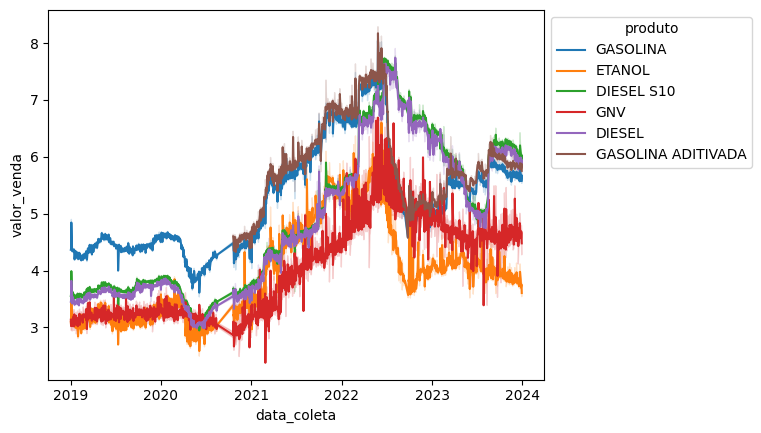

In [28]:
ax = sns.lineplot(data = df_anp, x = 'data_coleta', y = 'valor_venda', hue = 'produto')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1)) 

# This code snippet is using the seaborn library to create a line plot from a pandas DataFrame named df_anp. Here's a step-by-step explanation:

# ax = sns.lineplot(data = df_anp, x = 'data_coleta', y = 'valor_venda', hue = 'produto'): This line creates a line plot where:

#- data = df_anp specifies the source DataFrame for the plot.
#- x = 'data_coleta' sets the column 'data_coleta' as the x-axis. This column likely represents the date of data collection.
#- y = 'valor_venda' sets the column 'valor_venda' as the y-axis. This column likely represents the sale value or price.
#- hue = 'produto' differentiates the lines in the plot by the 'produto' column, which likely represents different products. This means there will be separate lines for each product, with different colors.
#- sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1)): This line moves the legend of the plot to a specific location.

#- ax is the Axes object returned by the lineplot function. It represents the plot itself.
#- 'upper left' specifies the part of the plot where the legend should be anchored.
#- bbox_to_anchor=(1, 1) sets the exact position of the legend. The coordinates (1, 1) place the legend outside the top right corner of the plot. The first value moves the legend horizontally (1 means all the way to the right of the plot area), and the second value moves it vertically (1 means all the way to the top of the plot area).

# In summary, this code snippet creates a line plot showing the sale value (valor_venda) over the collection date (data_coleta) for different products (produto). It then moves the legend to the upper left corner outside the plot area for better visibility and to avoid overlapping with the data visualization.

### Separando o Dataset para entender melhor a base

In [29]:
# separando o dataset por tipo de produto
gasolina_aditivada = df_anp[df_anp['produto'] == 'GASOLINA ADITIVADA']
gasolina = df_anp[df_anp['produto'] == 'GASOLINA']
diesel_s10 = df_anp[df_anp['produto'] == 'DIESEL S10']
diesel = df_anp[df_anp['produto'] == 'DIESEL']
etanol = df_anp[df_anp['produto'] == 'ETANOL']
gnv = df_anp[df_anp['produto'] == 'GNV']

# This code snippet is filtering rows from a DataFrame named df_anp based on the value of the 'produto' column. For each type of fuel ('GASOLINA ADITIVADA', 'GASOLINA COMUM', 'DIESEL S10', 'DIESEL', 'ETANOL', 'GNV'), it creates a new DataFrame containing only the rows where the 'produto' column matches the specified fuel type. Here's a breakdown:

# - gasolina_aditivada: Contains rows from df_anp where the 'produto' column is 'GASOLINA ADITIVADA'.
# - gasolina: Contains rows from df_anp where the 'produto' column is 'GASOLINA COMUM'.
# - diesel_s10: Contains rows from df_anp where the 'produto' column is 'DIESEL S10'.
# - diesel: Contains rows from df_anp where the 'produto' column is 'DIESEL'.
# - etanol: Contains rows from df_anp where the 'produto' column is 'ETANOL'.
# - gnv: Contains rows from df_anp where the 'produto' column is 'GNV'.

# This is a common operation when you need to perform analysis or operations on specific subsets of a dataset based on some criteria, in this case, the type of fuel.

### Criando funções que auxiliam a plotar gráficos

In [30]:
def plotar_boxplot_2V(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.boxplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)

# This Python function, plotar_boxplot_2V, is designed to create a boxplot visualization using the seaborn library, which is a popular visualization library based on matplotlib. Here's a step-by-step explanation of what each part of the function does:

# 1. Function Definition: def plotar_boxplot_2V(titulo, labelx, labely, x, y, dataset):
  # This line defines a function named plotar_boxplot_2V that takes six parameters: titulo (title of the plot), labelx (label for the x-axis), labely (label for the y-axis), x (data for the x-axis), y (data for the y-axis), and dataset (the dataset containing the data to be plotted).

# 2. Setting the Color Palette: sns.set_palette('Accent')
  # This line sets the color palette for the plot to 'Accent' using seaborn's set_palette function. The 'Accent' palette is a predefined color palette in seaborn.

# 3. Setting the Plot Style: sns.set_style('darkgrid')
  # This line sets the background style of the plot to 'darkgrid' using seaborn's set_style function. The 'darkgrid' style provides a dark background with grid lines, which is useful for visualizing data points on the plot.

# 4. Creating the Boxplot: ax = sns.boxplot(x = x, y = y, data = dataset)
  # This line creates a boxplot using seaborn's boxplot function. It assigns the plot to the variable ax. The function parameters specify the columns from dataset to be used for the x and y axes (x and y), and the dataset itself (dataset).

# 5. Setting the Figure Size: ax.figure.set_size_inches(12, 6)
  # This line sets the size of the figure to 12 inches in width and 6 inches in height using the set_size_inches method of the figure object (ax.figure).

# 6. Setting the Title: ax.set_title(titulo, loc = 'left', fontsize = 18)
  # This line sets the title of the plot to the value of the titulo parameter. The title is aligned to the left (loc = 'left') and the font size is set to 18.

# 7. Setting the X-axis Label: ax.set_xlabel(labelx, fontsize = 14)
  # This line sets the label of the x-axis to the value of the labelx parameter with a font size of 14.

# 8. Setting the Y-axis Label: ax.set_ylabel(labely, fontsize = 14)
  # This line sets the label of the y-axis to the value of the labely parameter with a font size of 14.

# Overall, this function is a utility for creating customized boxplots with seaborn, allowing for easy adjustments to titles, labels, and aesthetics.

In [31]:
def plotar_boxplot_geral(y, dataset):
  ax = sns.boxplot(y=y, data=dataset)
  ax.figure.set_size_inches(4, 4)

# This Python function, plotar_boxplot_geral, is designed to create and display a boxplot for a specified dataset and variable. Here's a step-by-step explanation:

# 1. Function Definition: The function is named plotar_boxplot_geral and takes two parameters:
  # - y: The name of the variable for which the boxplot will be created. This is expected to be a string that matches one of the column names in the dataset.
  # - dataset: The dataset containing the data. This is expected to be a pandas DataFrame where one of the columns matches the name provided in y.

# 2. Creating the Boxplot:
  # - sns.boxplot(y=y, data=dataset): This line uses the seaborn library (aliased as sns) to create a boxplot. The y parameter specifies the column in dataset for which the boxplot is to be created. The data parameter is the DataFrame containing the data.
  # - The result of sns.boxplot is assigned to ax. This ax object represents the Axes of the plot, which can be used for further customization.

# 3. Customizing Plot Size:
  # - ax.figure.set_size_inches(4, 4): This line sets the size of the figure containing the boxplot to 4 inches by 4 inches. The figure property of ax refers to the Figure object that contains the Axes. The set_size_inches method is used to specify the width and height in inches.

# In summary, this function creates a boxplot for a specified variable from a given dataset and sets the figure size to 4x4 inches.

### Analisando os combustíveis

#### Gasolina Aditiviada - 2019/2023

In [32]:
# Estatística básica de cada produto
print('Gasolina aditivada')
gasolina_aditivada.valor_venda.describe().round(2)

# Este trecho de código em Python está realizando uma operação de análise estatística básica sobre os dados de venda de um produto, especificamente "gasolina aditivada". Aqui está o que cada parte faz:

# 1. print('Gasolina aditivada'): Exibe o texto "Gasolina aditivada" no console. Isso serve como um cabeçalho ou título para os resultados que serão mostrados a seguir.

# 2. gasolina_aditivada.valor_venda.describe(): Esta linha é onde a análise estatística acontece. Supõe-se que gasolina_aditivada seja um DataFrame (uma estrutura de dados bidimensional que pode armazenar dados de tipos variados) da biblioteca pandas, que é amplamente utilizada para manipulação e análise de dados em Python. O DataFrame contém uma coluna chamada valor_venda, que provavelmente armazena os valores de venda da gasolina aditivada.
  # - .describe(): Este método gera estatísticas descritivas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores NaN (Not a Number). Por padrão, ele fornece informações como a contagem de valores, a média, o desvio padrão, o valor mínimo, os percentis 25%, 50% (mediana) e 75%, e o valor máximo.
  # - .round(2): Este método arredonda os valores numéricos das estatísticas descritivas para duas casas decimais, tornando os resultados mais legíveis.

# Em resumo, este código imprime um título "Gasolina aditivada" e, em seguida, exibe estatísticas descritivas básicas (como média, desvio padrão, valores mínimos e máximos, etc.) dos valores de venda da gasolina aditivada, com os resultados arredondados para duas casas decimais.

Gasolina aditivada


count    521467.00
mean          6.02
std           0.83
min           3.46
25%           5.45
50%           5.90
75%           6.59
max           9.79
Name: valor_venda, dtype: float64

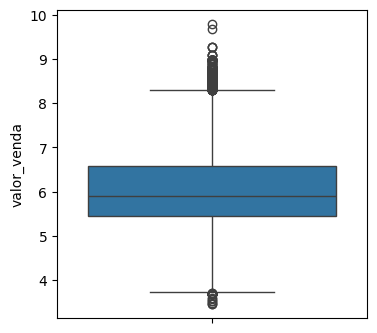

In [33]:
plotar_boxplot_geral('valor_venda', gasolina_aditivada)

# The code snippet Python function call, here's a breakdown of its components:

# plotar_boxplot_geral(...): This is a function call. The function name suggests that it is designed to plot a general boxplot. A boxplot is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can reveal outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

# 'valor_venda': This is the first argument to the function and it is a string. This argument likely specifies the data column for which the boxplot should be generated. In this context, it seems to be the sales value (possibly of a product or service).

# gasolina_aditivada: This is the second argument to the function. It appears to be a variable, most likely a DataFrame or a Series object (given the context and common naming conventions in Python, particularly when using pandas). This object probably contains data related to "gasolina aditivada" (which translates to "additive-enhanced gasoline" in English), including sales values among possibly other related information.

# In summary, this line of code is instructing Python to plot a boxplot for the sales values ('valor_venda') contained within the gasolina_aditivada dataset. This could be used for exploratory data analysis, allowing the user to visually inspect the distribution of sales values, identify any potential outliers, and understand the spread and central tendency of the data.

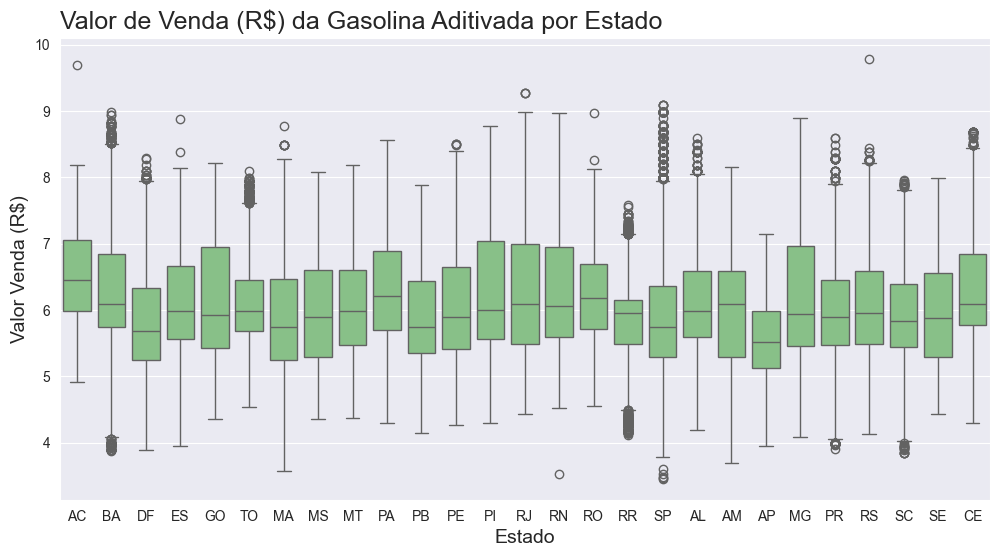

In [34]:
plotar_boxplot_2V('Valor de Venda (R$) da Gasolina Aditivada por Estado', 
                  'Estado',
                  'Valor Venda (R$)',
                  'estado',
                  'valor_venda',
                  gasolina_aditivada)

# This Python code snippet is a function call to plotar_boxplot_2V, which appears to be a custom function designed for plotting a two-variable boxplot. Here's a breakdown of its parameters:

# 1. 'Valor de Venda (R$) da Gasolina Aditivada por Estado': This is the title of the boxplot. It translates to "Sale Price (R$) of Additive-Enhanced Gasoline by State" in English. This title suggests that the boxplot will display the distribution of sale prices for additive-enhanced gasoline across different states.

# 2. 'Estado': This parameter likely specifies the label for the categorical axis (usually the x-axis) of the boxplot, which in this case is "State". This means that the boxplot will categorize data based on different states.

# 3. 'Valor Venda (R$)': This parameter likely specifies the label for the numerical axis (usually the y-axis) of the boxplot, which in this case is "Sale Price (R$)". This indicates that the boxplot will display the distribution of sale prices in Brazilian Real (R$).

# 4. 'estado': This parameter seems to be the name of the column in the provided dataset (gasolina_aditivada) that contains the state information for each data point. This column will be used to categorize the data into different states on the boxplot.

# 5. 'valor_venda': This parameter appears to be the name of the column in the dataset (gasolina_aditivada) that contains the sale price information for each data point. This column will be used to determine the distribution of sale prices that will be displayed on the boxplot.

# 6. gasolina_aditivada: This is the dataset being passed to the function. Based on the name, it likely contains data related to the sale of additive-enhanced gasoline, including at least the state and sale price for each data point.


# In summary, this function call is instructing Python to create a boxplot that displays the distribution of sale prices for additive-enhanced gasoline across different states. The boxplot will use the state information to categorize the data and the sale price information to determine the distribution within each state category. This can be useful for visualizing how the sale price of additive-enhanced gasoline varies by state, identifying any outliers, and understanding the spread and central tendency of the sale prices within each state.

#### Gasolina Comum - 2019 / 2023

In [35]:
print('Gasolina Comum')
gasolina.valor_venda.describe().round(2)

Gasolina Comum


count    1184447.00
mean           5.23
std            1.01
min            2.87
25%            4.40
50%            5.00
75%            5.89
max            8.99
Name: valor_venda, dtype: float64

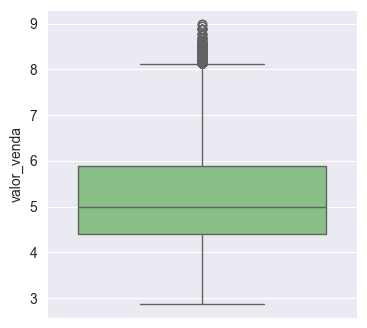

In [36]:
plotar_boxplot_geral('valor_venda', gasolina)

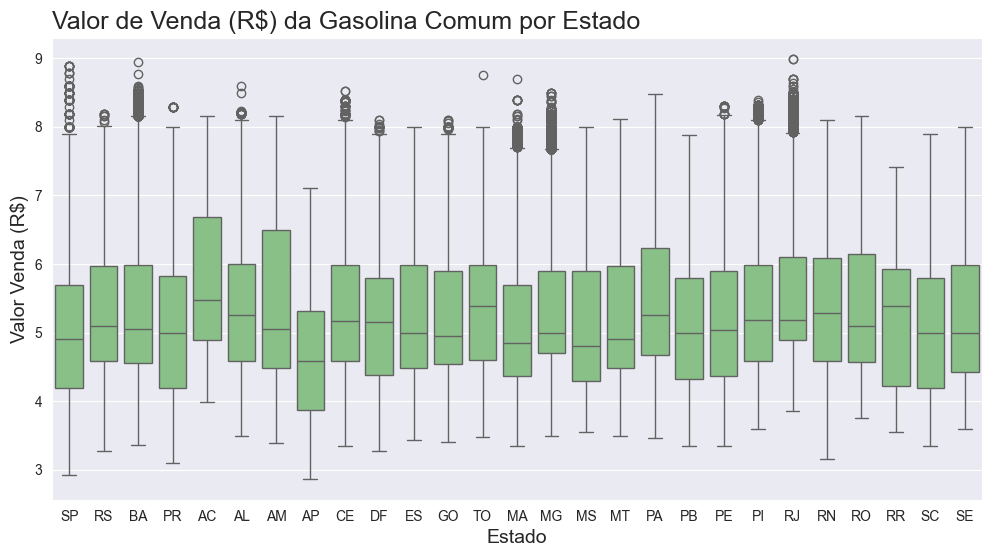

In [37]:
plotar_boxplot_2V('Valor de Venda (R$) da Gasolina Comum por Estado',
                  'Estado',
                  'Valor Venda (R$)',
                  'estado',
                  'valor_venda',
                  gasolina)

#### Diesel S10 - 2019 / 2023

In [38]:
print('Diesel S10')
diesel_s10.valor_venda.describe().round(2)

Diesel S10


count    945165.00
mean          4.82
std           1.35
min           2.46
25%           3.68
50%           4.45
75%           5.97
max           9.65
Name: valor_venda, dtype: float64

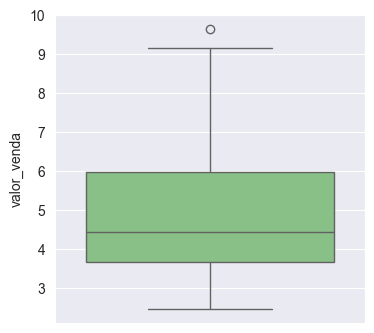

In [39]:
plotar_boxplot_geral('valor_venda', diesel_s10)

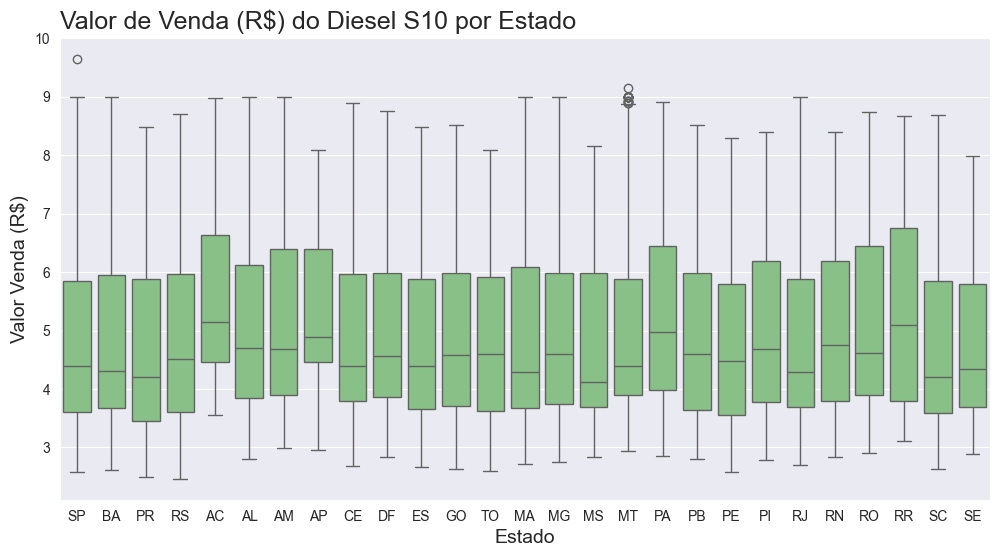

In [40]:
plotar_boxplot_2V('Valor de Venda (R$) do Diesel S10 por Estado',
                  'Estado',
                  'Valor Venda (R$)',
                  'estado',
                  'valor_venda',
                  diesel_s10)

#### Diesel Comum - 2019 / 2023

In [41]:
print('Diesel')
diesel.valor_venda.describe().round(2)

Diesel


count    567531.00
mean          4.69
std           1.34
min           2.45
25%           3.55
50%           4.25
75%           5.79
max           9.00
Name: valor_venda, dtype: float64

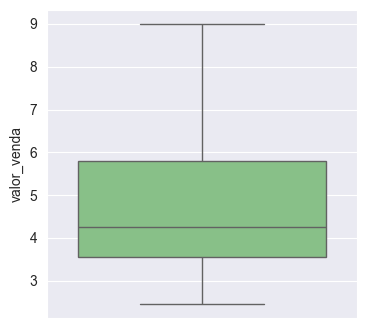

In [42]:
plotar_boxplot_geral('valor_venda', diesel)

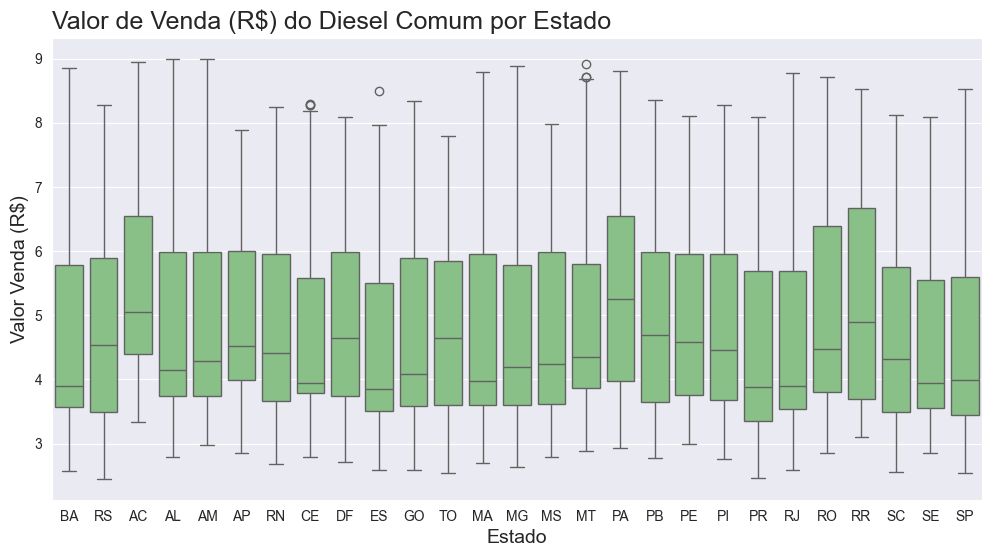

In [43]:
plotar_boxplot_2V('Valor de Venda (R$) do Diesel Comum por Estado',
                  'Estado',
                  'Valor Venda (R$)',
                  'estado',
                  'valor_venda',
                  diesel)

#### Etanol - 2019 / 2023

In [44]:
print('Etanol')
etanol.valor_venda.describe().round(2)

Etanol


count    1043954.00
mean           3.92
std            0.96
min            1.80
25%            3.19
50%            3.79
75%            4.57
max            7.98
Name: valor_venda, dtype: float64

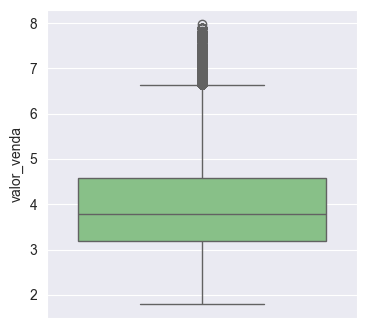

In [45]:
plotar_boxplot_geral('valor_venda', etanol)

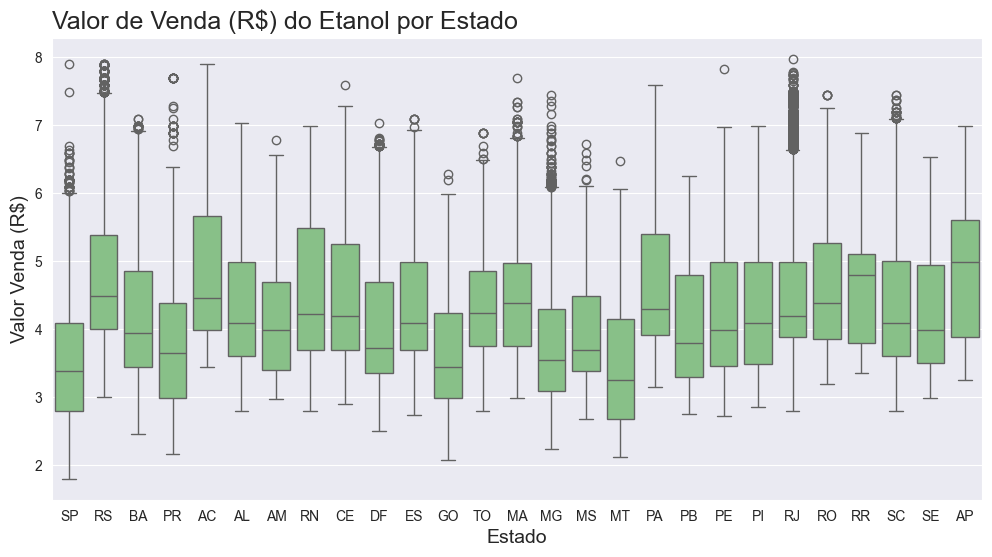

In [46]:
plotar_boxplot_2V('Valor de Venda (R$) do Etanol por Estado',
                  'Estado',
                  'Valor Venda (R$)',
                  'estado',
                  'valor_venda',
                  etanol)

#### GNV - 2019 / 2023

In [47]:
print('GNV')
gnv.valor_venda.describe().round(2)

GNV


count    79804.00
mean         4.07
std          0.91
min          2.00
25%          3.26
50%          4.00
75%          4.79
max          7.99
Name: valor_venda, dtype: float64

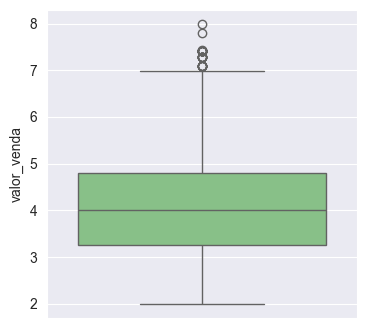

In [48]:
plotar_boxplot_geral('valor_venda', gnv)

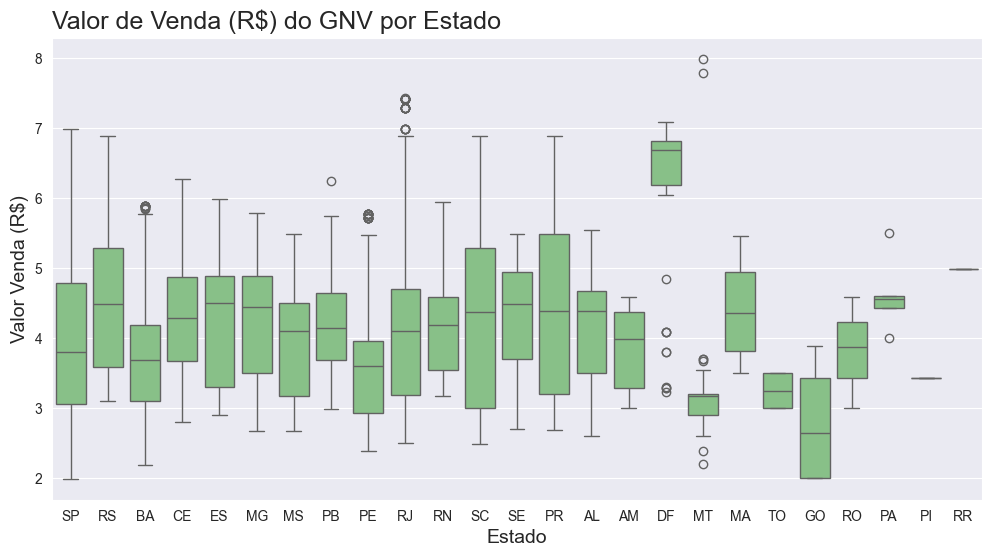

In [49]:
plotar_boxplot_2V('Valor de Venda (R$) do GNV por Estado',
                  'Estado',
                  'Valor Venda (R$)',
                  'estado',
                  'valor_venda',
                  gnv)

### Quantidade de Bandeiras distribuidoras de combustível

In [50]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,4.199,2019,1
1,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2.899,2019,1
2,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,3.349,2019,1
3,2019-01-03,SE,SP,GUARULHOS,PETROBRAS DISTRIBUIDORA S.A.,GNV,2.439,2019,1
4,2019-01-02,S,RS,CANOAS,BRANCA,GASOLINA,4.399,2019,1


In [51]:
df_anp['bandeira'].nunique()

# This line of Python code is performing an operation on a pandas DataFrame named df_anp. Specifically, it is calling the .nunique() method on the 'bandeira' column of the DataFrame. The method .nunique() returns the number of unique values in the specified column. In this context, it will count how many different 'bandeira' values are present in the DataFrame df_anp, effectively giving you the count of unique brands or flags (assuming 'bandeira' refers to some kind of categorical identifier, such as a brand name or flag).

80

In [52]:
bandeiras_estado = df_anp_bandeira_estado.groupby('estado').bandeira.nunique().reset_index()

# This line of Python code is working with a pandas DataFrame named df_anp_bandeira_estado. Here's a step-by-step explanation:

# 1. Grouping by 'estado': The .groupby('estado') method is used to group the DataFrame by the 'estado' column. This means that for each unique value in the 'estado' column, a separate group is created.

# 2. Counting unique 'bandeira': Within each group created in the previous step, the .bandeira.nunique() method is called. This counts the number of unique values in the 'bandeira' column for each group. The 'bandeira' column likely contains categorical data, and this step is calculating how many unique categories exist within each 'estado'.

# 3. Resetting the index: The .reset_index() method is used at the end. This is often done after a grouping operation to convert the index (in this case, the unique 'estado' values) back into a regular column. This makes the resulting DataFrame easier to work with, as it now has a default integer index.

# The result, bandeiras_estado, is a new DataFrame with two columns: 'estado' and the count of unique 'bandeira' values within each 'estado'. This could be used to understand the diversity of 'bandeira' (which might represent brands, flags, or some other categorical variable) within each state or region denoted by 'estado'.

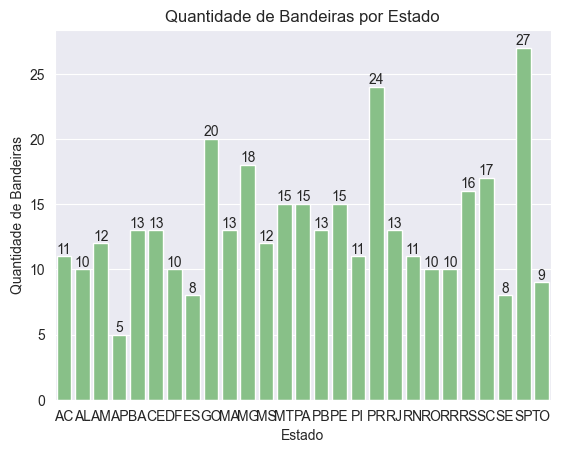

In [53]:
sns.barplot(x='estado', y='bandeira', data=bandeiras_estado)

plt.title('Quantidade de Bandeiras por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Bandeiras')

for index, row in bandeiras_estado.iterrows():
    plt.annotate(row['bandeira'], xy=(index, row['bandeira']), ha='center', va='bottom')

plt.show()

# This Python code snippet is using the seaborn and matplotlib libraries to create and annotate a bar plot visualizing the quantity of "bandeiras" (which could translate to "flags" or "brands") per "estado" (state). Here's a breakdown:

# 1. Creating a Bar Plot:
    # - sns.barplot(x='estado', y='bandeira', data=bandeiras_estado): This line creates a bar plot with seaborn (sns). The x-axis represents different states ('estado'), and the y-axis represents the quantity of 'bandeiras'. The data for the plot is taken from the DataFrame bandeiras_estado.

# 2. Setting the Plot Title and Labels:
    # - plt.title('Quantidade de Bandeiras por Estado'): Sets the title of the plot to "Quantidade de Bandeiras por Estado" (Quantity of Flags by State).
    # - plt.xlabel('Estado') and plt.ylabel('Quantidade de Bandeiras'): These lines set the labels for the x-axis and y-axis to 'Estado' (State) and 'Quantidade de Bandeiras' (Quantity of Flags), respectively.

# 3. Annotating the Bar Plot:
    # - The for loop iterates over each row in the bandeiras_estado DataFrame. For each row (or state), it annotates the bar in the plot with the quantity of 'bandeiras'.
    # - plt.annotate(row['bandeira'], xy=(index, row['bandeira']), ha='center', va='bottom'): This line adds an annotation to the plot. row['bandeira'] is the text to be displayed (the quantity of 'bandeiras'), xy=(index, row['bandeira']) specifies the position of the annotation (aligned with each bar), and ha='center', va='bottom' adjusts the alignment of the text to be centered horizontally (ha) and positioned at the bottom (va) of the bar.

# 4. Displaying the Plot:
    # - plt.show(): This line displays the plot. Without this, the plot would not be visible in most environments.

# Overall, this code visualizes the distribution of 'bandeiras' across different 'estados', providing a clear visual representation of the data that can be more intuitive than raw numbers.